In [2]:
from sklearn.datasets import load_iris
iris_data = load_iris()
type(iris_data)

sklearn.utils._bunch.Bunch

In [3]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
import pandas as pd
iris_df = pd.DataFrame(data = iris_data['data'], columns = iris_data['feature_names'])
iris_df['label'] = iris_data['target']
iris_df['flower name'] = iris_df['label'].apply(
    lambda x: 'setosa' if x== 0 else ('versicolor' if x == 1 else 'virgnica'))
iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,flower name
92,5.8,2.6,4.0,1.2,1,versicolor
67,5.8,2.7,4.1,1.0,1,versicolor
142,5.8,2.7,5.1,1.9,2,virgnica
0,5.1,3.5,1.4,0.2,0,setosa
17,5.1,3.5,1.4,0.3,0,setosa


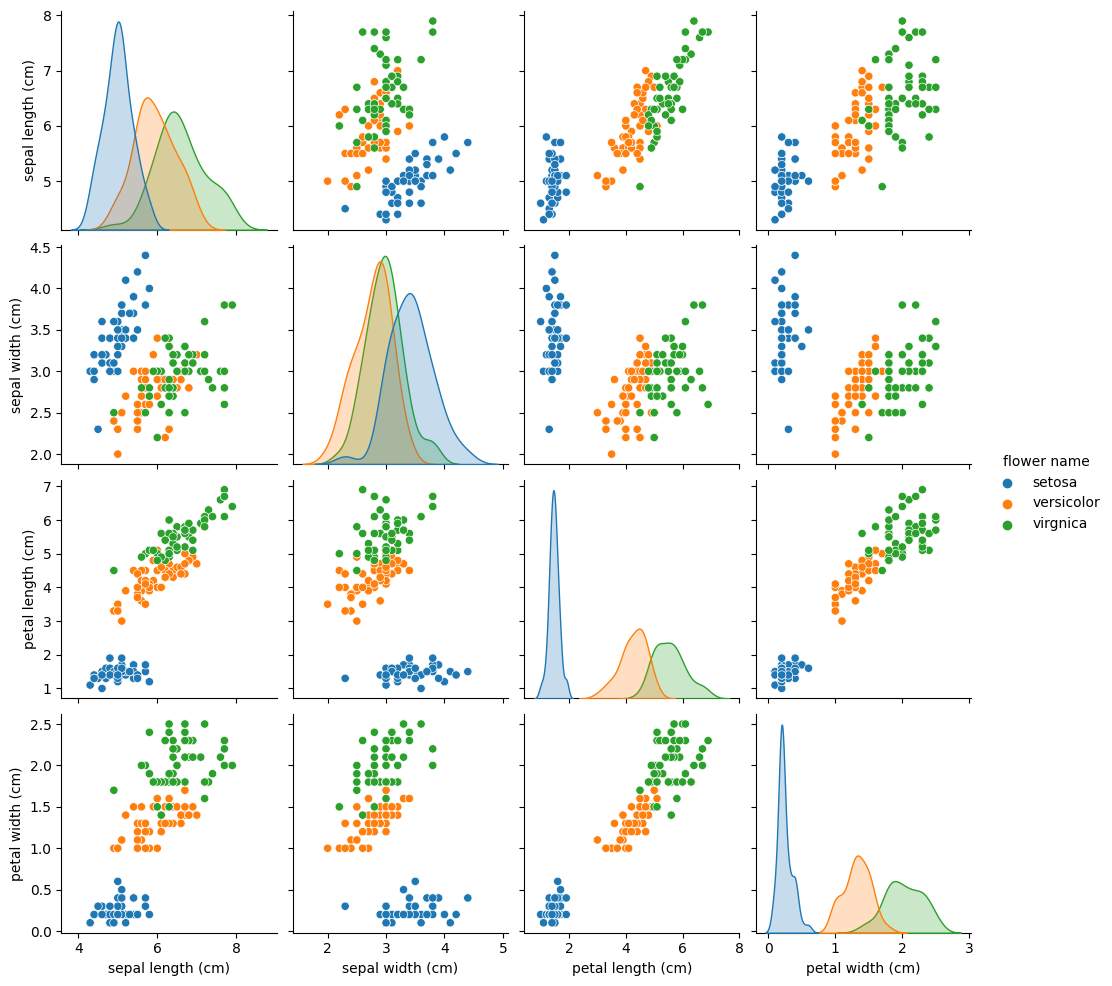

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(iris_df, hue = 'flower name', vars = iris_data['feature_names'])
plt.show()

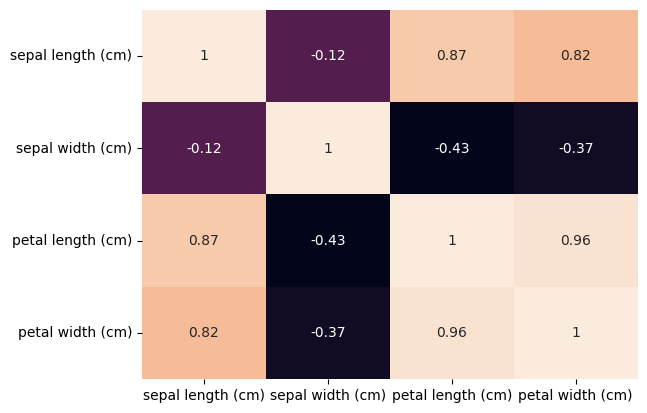

In [10]:
sns.heatmap(iris_df.iloc[:, : 4].corr(), annot=True, cbar=False)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_df.iloc[:, : 4], iris_df['label'], test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train_scaled, y_train)
y_pred = knn.predict(x_test_scaled)

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_knn = confusion_matrix(y_test, y_pred)
cm_knn

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

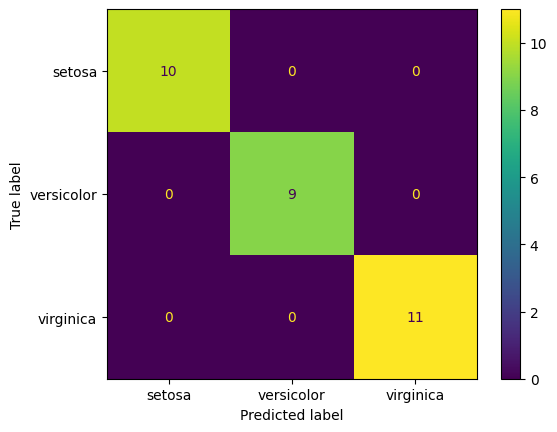

In [16]:
cm_knn_display = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=iris_data['target_names'])
cm_knn_display.plot()
plt.show()

In [18]:
import tensorflow as tf
import keras
from keras import layers
model = keras.Sequential(
    [
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(3, activation='softmax')
    ]

)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(X_train, y_train, epochs=100)

In [21]:
preds = model.predict(X_test)
preds_ix = preds.argmax(axis=1)

1/1 [==============================] - 0s 153ms/step


In [23]:
cm_ann = confusion_matrix(y_test, preds_ix)
cm_ann

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

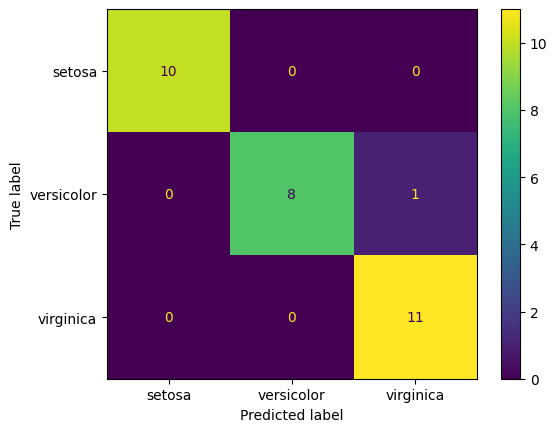

In [24]:
cm_ann_display = ConfusionMatrixDisplay(confusion_matrix=cm_ann, display_labels=iris_data['target_names'])
cm_ann_display.plot()
plt.show()